<h3>Análises Exploratórias</h3>

Usamos técnicas exploratórias para entender menlhor nosso dataset. Nesse caso, iremos,a partir delas, descobrir as principais razões que levam ao atraso de voos.

## Sumário

-   [1. Carregando Biblioteca e Dataset](#cell1)
-   [2. Analizando Padrões com Visualização](#cell2)
-   [3. Agrupando Dados](#cell3)
-   [4. Correlação](#cell4)

<h3>Carregando Biblioteca e Dataset</h3>

Vamos primeiramente carregar os dados e ferramentas que precisamos.

In [55]:
# Carrega tidyverse
library(tidyverse)

A empresa IBM, mantém em seu site uma série de conjunto de dados. Nesse caso usaremos o <a href="https://developer.ibm.com/exchanges/data/all/airline/">Airline Dataset</a> que contém dados de mais de 200 milhões de voos domésticos feitos em território americano, coletados pelo Departamento de Estatísticas de Transporte dos Estados Unidos. Por questões didáticas usaremos a amostra desses dados e não o arquivo inteiro.

<ul>
    <li>data source: <a href="https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz" target="_blank">https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz</a></li>
    <li>data type: csv</li>
</ul>

In [56]:
# url onde os dados estão localizados
# url <- "https://dax-cdn.cdn.appdomain.cloud/dax-airline/1.0.1/lax_to_jfk.tar.gz"

# download do arquivo
#download.file(url, destfile = "lax_to_jfk.tar.gz")

# extrair arquivo 
# remova tar = "internal se estiver rodando este programa localmente" 
# untar("lax_to_jfk.tar.gz", tar = "internal")

# Lemos o arquivo csv => read_csv (Se for de um formato diferente use a função apropriada, verifique a documentação de readr)
companhias_aereas <- read_csv("dados/losAngeles_para_novaYork.csv",
                     col_types = cols(
                      'DivDistance' = col_number(),
                      'DivArrDelay' = col_number()
                      ))

## Visualização

A biblioteca `ggplot` nos permite criar gráficos e faz parte do biblioteca `tidyverse`.

A principal função usada na criação de gráficos é `geom_boxplot()`. Podemos, no entanto, usar outras para customizar nosso gráfico.

-   `geom_boxplot()`: Gera um diagrama de caixa. 
-   `geom_jitter()`: Usamos pontos para analisar a dispersão no gráfico.
-   `ggtitle()`: Título do gráfico
-   `guides()`: Guides for each scale can be set scale-by-scale with the guide argument.
-   `theme_minimal()`: Tema minimalista para o gráfico
-   `coord_cartesian()`: Coordenadas cartesianas, podemos dar um "zoom" no gráfico

### Diagrama de Caixa

Também chamado de box plot, o diagrama de caixa é uma ferramenta gráfica em que cada caixa representa uma variável a ser análisada. A mesma destaca os quartis, mediana, maior e menor valor. No código abaixo vemos a distribuição de atrasos (na chegada) para cada companhia aérea. 

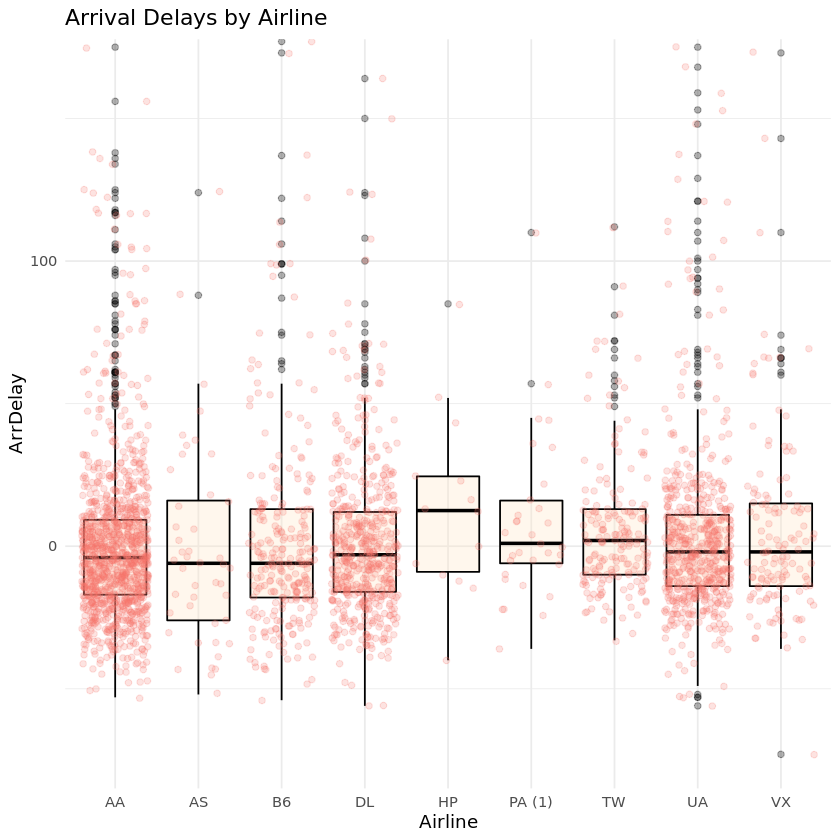

In [57]:
# Boxplot
ggplot(data = companhias_aereas, mapping = aes(x = Reporting_Airline, y = ArrDelay)) +
  geom_boxplot(fill = "bisque",color = "black", alpha = 0.3) +
  geom_jitter(aes(color = 'blue'), alpha=0.2) +
  labs(x = "Airline") +
  ggtitle("Arrival Delays by Airline") +
  guides(color = FALSE) +
  theme_minimal() +
  coord_cartesian(ylim = quantile(companhias_aereas$ArrDelay, c(0, 0.99)))

### Diagrama de Dispersão

Permite relacionar variáveis númericas. Nele cada instância é representada por um ponto. Apresenta o problema de que instâncias com o mesmo valor ficaram sobrepostas. No gráfico abaxo podemos notar que quanto maior o tempo de atraso na partida maior o tempo de atraso na chegada.

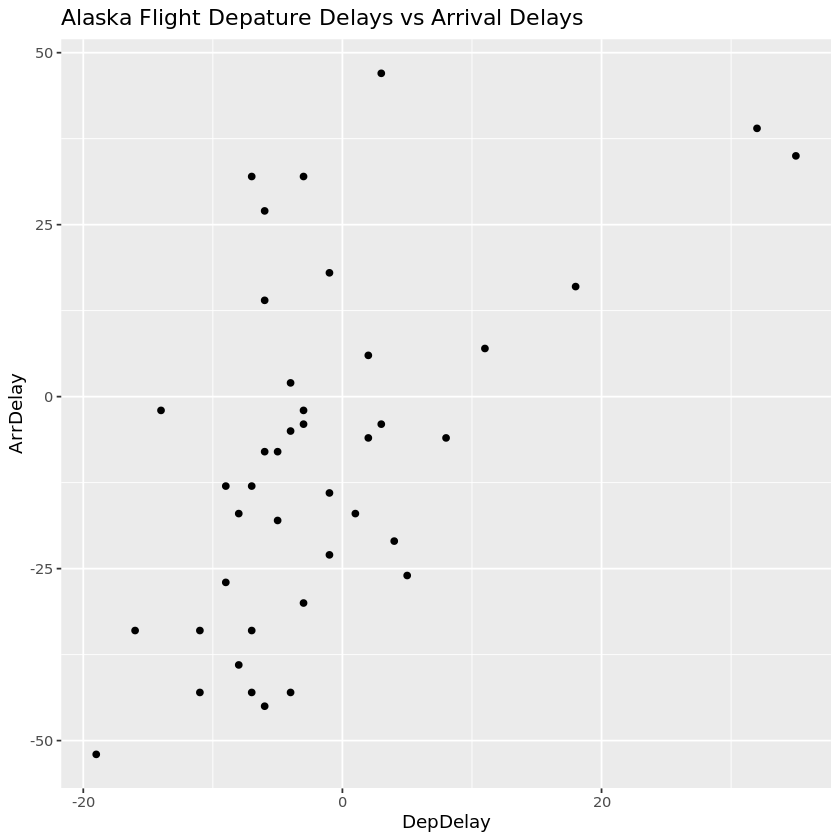

In [58]:
# Carregamos os dados da companhia Alaska
# Retiramos os valores NA
# Usaremos as colunas Atraso na Partida (Departure Delay) e Atraso na Chegada(Arrival Delay)
alaska_voos <- companhias_aereas %>%
  filter(Reporting_Airline == "AS") %>%
  filter(!is.na(DepDelay) & !is.na(ArrDelay)) %>%
  filter(DepDelay < 40)

ggplot(data = alaska_voos, mapping = aes(x = DepDelay, y = ArrDelay)) +
   geom_point() +
   ggtitle("Alaska Flight Depature Delays vs Arrival Delays")

## Agrupando Dados

Agrupamos dados a fim de análisar a relação entre eles. Por exemplo: existe alguma relação entre a companhia aérea e o atraso num voo? Se sim o dia da semana tem um impacto nesse tempo?
Para responder essas perguntas podemos agrupar os dados referentes a diferentes companhias e comparar os dias da semana. 

In [59]:
# Média entre Companhias Áereas e Dias da Semana
média_atrasos <- companhias_aereas %>%
    group_by(Reporting_Airline, DayOfWeek) %>%
    summarize(mean_delays = mean(ArrDelayMinutes))

In [60]:
# Organiza o dataframe, colocando as companhias com maior atraso 
média_atrasos %>% arrange(desc(mean_delays))
# Concluímos que PA(1) - Pan American World Airways tem a maior atraso nos voos nas Sextas e Sábados

Reporting_Airline,DayOfWeek,mean_delays
<chr>,<dbl>,<dbl>
PA (1),6,121.83333
PA (1),5,36.50000
TW,6,34.80952
B6,7,26.82051
HP,5,26.00000
VX,2,25.65217
HP,2,25.00000
AS,2,24.80000
HP,1,23.33333


## Correlação

Correlação Positiva é quando duas variáveis movem-se na mesma direção, em outras palavras, crescem e diminuem juntas.
Correlação Negativa é quando duas variáveis se movem em direções opostas.
O coeficiente de uma correlção varia de -1 (Correlação Negativa Perfeita) a 1 (Correlação Positiva Perfeita). Incluindo o 0 (Não há correlação).
Vamos analisar a correlação entre ArrDelayMinutes (Atraso em minutos na chegada) e DepDelayMinutes (Atraso em minutos na partida).

`geom_smooth()` using formula 'y ~ x'


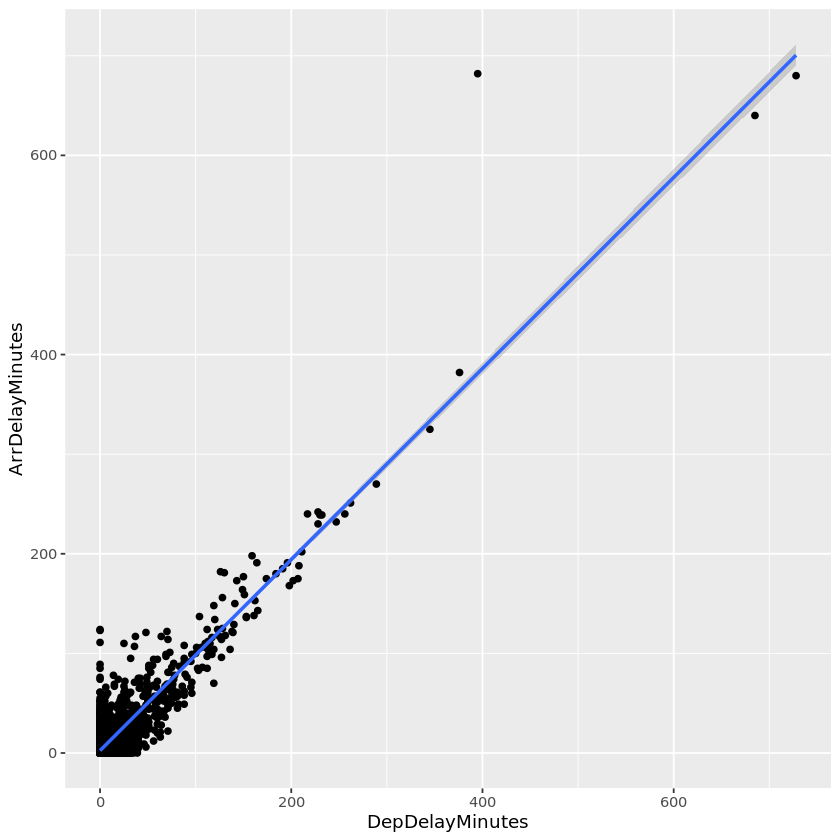

In [61]:
# A linha azul do gráfico mostra que há uma Correlação Positiva entre as duas variáveis
ggplot(companhias_aereas, aes(DepDelayMinutes, ArrDelayMinutes)) + geom_point() + geom_smooth(method = "lm")

`geom_smooth()` using formula 'y ~ x'


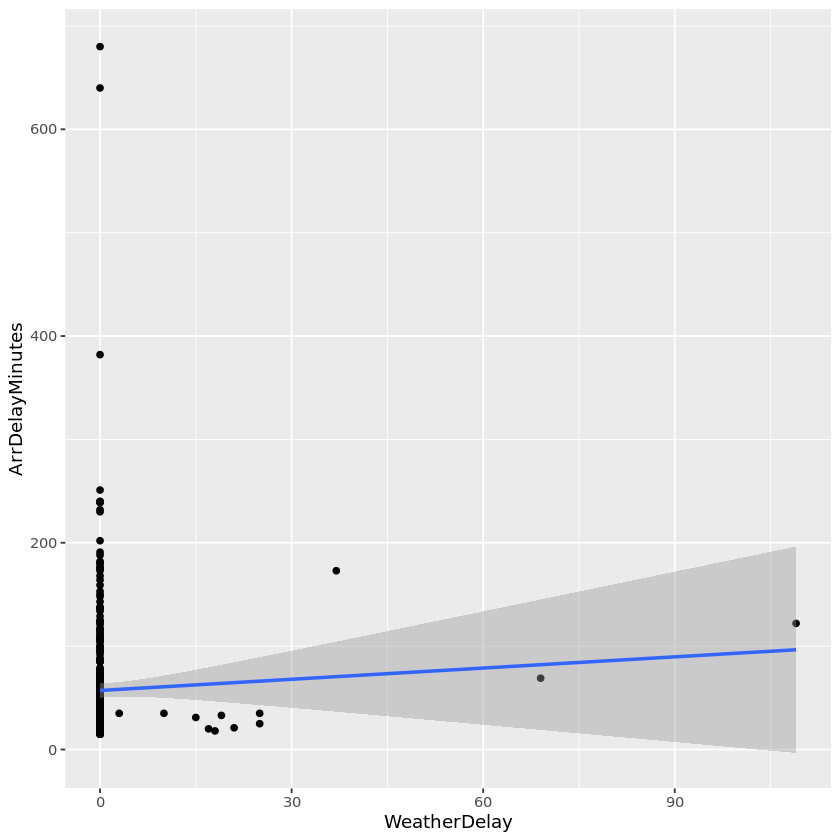

In [62]:
# Vamos ver a correlação entre ArrDelayMinutes (Atraso em minutos na chegada) e WeatherDelay (Atrasos causados pelo tempo)
ggplot(companhias_aereas, aes(WeatherDelay, ArrDelayMinutes)) + geom_point(na.rm = TRUE) + geom_smooth(method = "lm", na.rm = TRUE)
# Verificamos que não há correlação forte entre elas. Note que a linha azul está baixa

`geom_smooth()` using formula 'y ~ x'


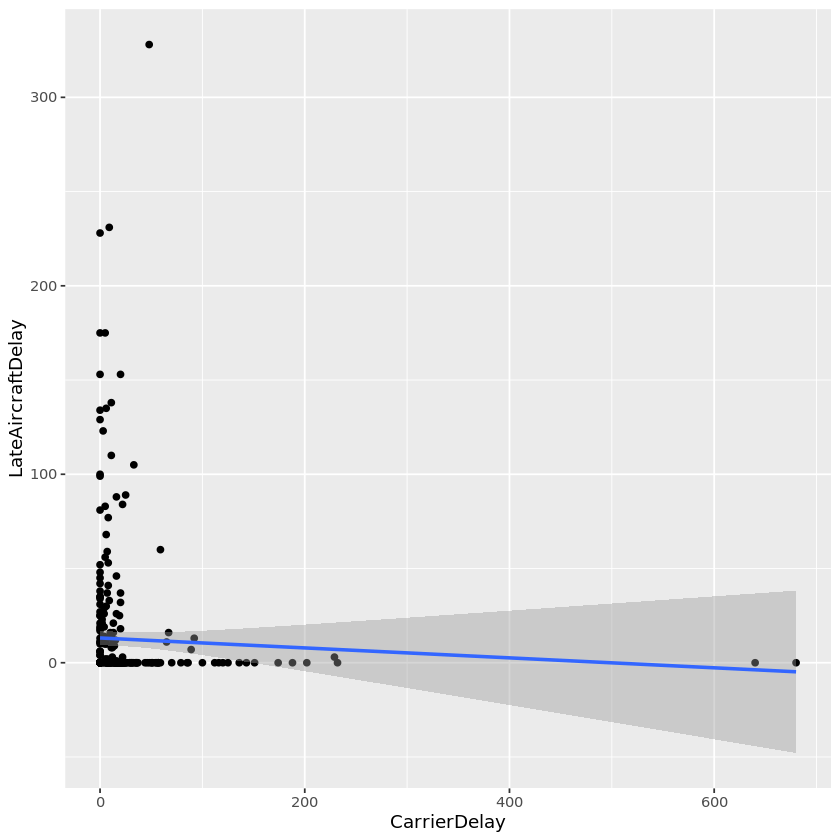

In [63]:
# Correlação entre CarrierDelay (Atrasos causados pela companhia) e LateAircraftDelay (Atraso causado por outro avião)
ggplot(companhias_aereas, aes(CarrierDelay, LateAircraftDelay)) + geom_point(na.rm = TRUE) + geom_smooth(method = "lm", na.rm = TRUE)
# Vemos que quanto maior o LateAircraftDelay menor é o CarrierDelay
# Ou seja, uma correlação negativa, contudo a linha azul baixa mostra que CarrierDelay não é a melhor variável para essa análise

Para medir a correlação entre duas variáveis podemos usar os métodos de Correlação de Pearson: o coeficiente de correlação ou o P-value.

Para interpretar o coeficiente de correlação temos as seguintes regras:

-   `Pŕoximo a 1`: Correlação Positiva. 
-   `Próximo a -1`: Correlação Negativa.
-   `Próximo a 0`: Não há correlação

Para interpretar o P-value temos as seguintes regras:

-   `P-value < 0.001`: Forte certeza no resultado
-   `P-value < 0.005`: Moderada certeza no resultado.
-   `P-value < 0.1`: Fraca certeza no resultado.
-   `P-value > 0.1`: Nenhuma certeza no resultado

Para saber se uma correlação é forte o coeficiente dela deve ser próximo a -1 ou 1. E o P-value deve ser menor que 0.001

In [64]:
companhias_aereas %>%
    select(DepDelay, ArrDelay) %>%
    cor(method = "pearson") # cor é a função que calcula o coeficiente de correlação

,DepDelay,ArrDelay
DepDelay,1.0000000,0.8826109
ArrDelay,0.8826109,1.0000000


In [65]:
companhias_aereas %>%
    cor.test(~DepDelay + ArrDelay, data = .)
# note que o p-value < 2.2e-16, ou seja, bem menor que 0.001
# portanto há uma forte correlação positiva entre DepDelay e ArrDelay


	Pearson's product-moment correlation

data:  DepDelay and ArrDelay
t = 100.28, df = 2853, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8742325 0.8904638
sample estimates:
      cor 
0.8826109 


In [ ]:
install.packages("corrplot")

In [ ]:
# Vamos ver a correlação entre mais variáveis
library(corrplot)

valores_numericos <- companhias_aereas %>%
                     select(ArrDelayMinutes, DepDelayMinutes, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay)

correlação_companhias <- cor(valores_numericos, method = "pearson", use='pairwise.complete.obs')

correlação_companhias

In [ ]:
col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA")) # Cores

corrplot(correlação_companhias, method = "color", col = col(200),  
         type = "upper", order = "hclust", 
         addCoef.col = "black", # Adiciona coeficiente de corelação
         tl.col = "black", tl.srt = 45, # Nome da legenda e sua rotação
         )